# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
  Using cached grpcio-1.60.0-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached numpy-1.26.2-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
  Using cached protobuf-4.25.1-cp310-abi3-win_amd64.whl (413 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached h5py-3.10.0-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.15.0-py3


[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.0
gast                         0.5.4
google-auth                  2.25.2
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.19.0
jedi                         0.19.1



[notice] A new release of pip available: 22.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf
import os

# 2. Import OpenCV

In [6]:
import cv2

# 3. Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
data = tf.keras.utils.image_dataset_from_directory('data',label_mode='categorical')

Found 3224 files belonging to 4 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

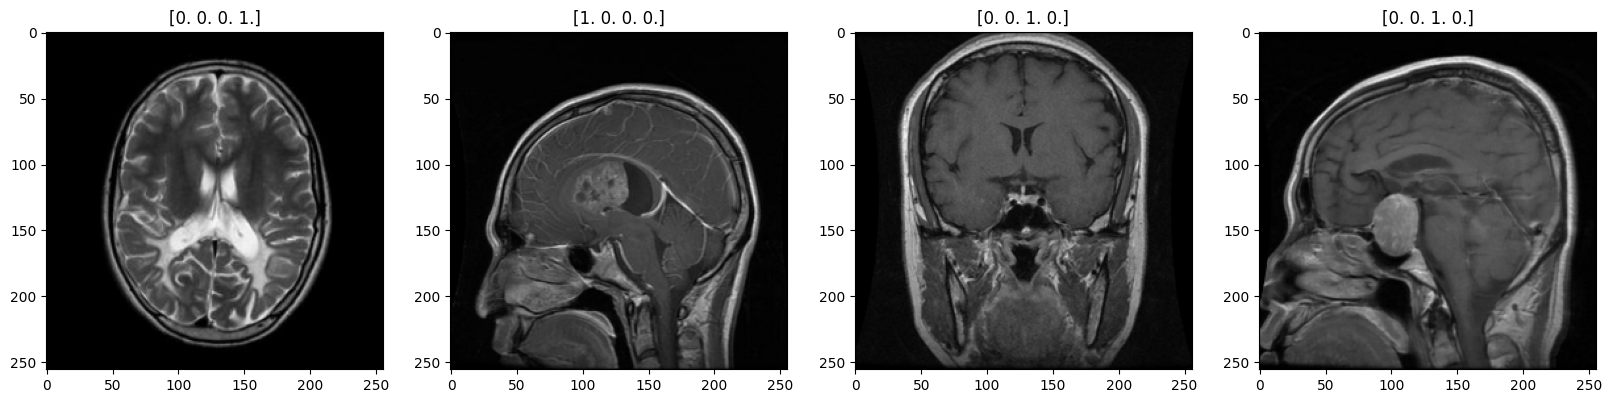

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          ...,
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118]],
 
         [[0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          ...,
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118]],
 
         [[0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          ...,
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118],
          [0.15294118, 0.15294118, 0.15294118]],
 
         ...,
 
         [[0.07058824, 0.07058824, 0.07058824],
          [0.07058

# 5. Split Data

In [39]:
print(len(data))

101


In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [41]:
train_size

70

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [52]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [56]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

# 7. Train

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
70/70 [==============================] - 111s 2s/step - loss: 1.0584 - accuracy: 0.5451 - val_loss: 0.7857 - val_accuracy: 0.6922
Epoch 2/20
70/70 [==============================] - 107s 2s/step - loss: 0.5678 - accuracy: 0.7728 - val_loss: 0.4843 - val_accuracy: 0.8266
Epoch 3/20
70/70 [==============================] - 108s 2s/step - loss: 0.3216 - accuracy: 0.8804 - val_loss: 0.4056 - val_accuracy: 0.8469
Epoch 4/20
70/70 [==============================] - 106s 2s/step - loss: 0.1948 - accuracy: 0.9259 - val_loss: 0.3408 - val_accuracy: 0.8703
Epoch 5/20
70/70 [==============================] - 108s 2s/step - loss: 0.1110 - accuracy: 0.9594 - val_loss: 0.3170 - val_accuracy: 0.9047
Epoch 6/20
70/70 [==============================] - 106s 2s/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.3477 - val_accuracy: 0.8984
Epoch 7/20
70/70 [==============================] - 106s 2s/step - loss: 0.0481 - accuracy: 0.9871 - val_loss: 0.2734 - val_accuracy: 0.9250
Epoch 8/20
70

# 8. Plot Performance

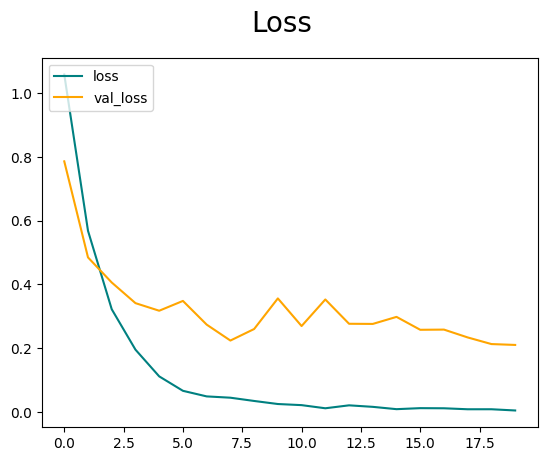

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

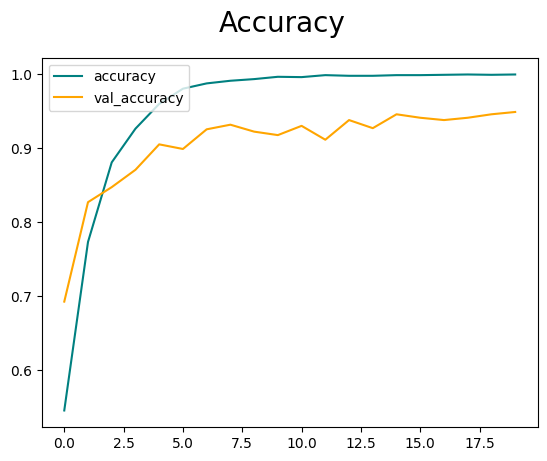

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [63]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [66]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 325ms/step


In [67]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()} , Accuracy:{acc.result().numpy()}')

Precision:0.9179810881614685,Recall:0.909375011920929 , Accuracy:0.909375011920929


# 10. Test

In [68]:
import cv2

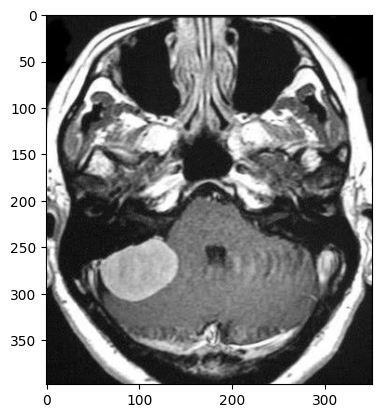

In [117]:
img = cv2.cvtColor(cv2.imread('mt_img (6).jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

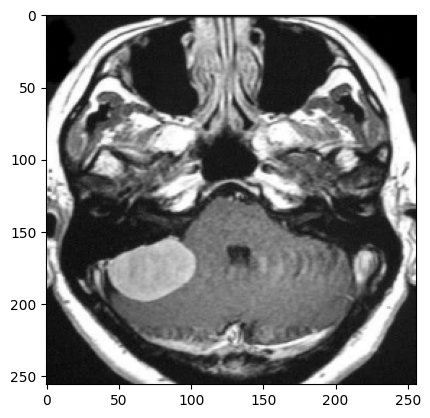

In [118]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [119]:
yhat = model.predict(np.expand_dims(resize/256, axis=0))

1/1 [==============================] - 0s 44ms/step


In [120]:
yhat

array([[2.8484735e-08, 1.0000000e+00, 1.0607247e-15, 1.0435183e-09]],
      dtype=float32)

In [121]:
predicted_class_index = np.argmax(yhat)

In [122]:
predicted_class_index

1

In [43]:
if predicted_class_index == 0:
    print(f'category1_tumor')
elif predicted_class_index == 2: 
    print(f'category2_tumor')
elif predicted_class_index == 3:
    print(f'category3_tumor')
else:
    print(f'no_tumore')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','Braintumor.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')